# Dataset Analysis

### Data and library Loading

In [32]:
# import libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
AT_df = pd.read_csv("AT-CRC_species.tsv", sep="\t")
CN_df = pd.read_csv("CN-CRC_species.tsv", sep="\t")
DE_df = pd.read_csv("DE-CRC_species.tsv", sep="\t")
FR_df = pd.read_csv("FR-CRC_species.tsv", sep="\t")
IT_df1 = pd.read_csv("IT-CRC_species.tsv", sep="\t")
IT_df2 = pd.read_csv("IT-CRC-2_species.tsv", sep="\t")
JP_df = pd.read_csv("JP-CRC_species.tsv", sep="\t")
US_df = pd.read_csv("US-CRC_species.tsv", sep="\t")


filename_list = ["AT-CRC_species.tsv", "CN-CRC_species.tsv"]
df_list = [AT_df, CN_df]

AT_df.head()

,condition,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,...,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000083,0.000083
1,control,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,...,0.0,0.000000,0.000000,0.000788,0.0,0.00000,0.0,0.0,0.000000,0.000000
2,control,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,...,0.0,0.000000,0.000194,0.000065,0.0,0.00084,0.0,0.0,0.001808,0.000000
3,control,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,...,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000
4,control,0.000085,0.019236,0.001111,0.000256,0.000085,0.000085,0.000000,0.000000,0.000513,...,0.0,0.000171,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000


In [34]:
AT_df['country']='Australia'
CN_df['country'] = 'China'
DE_df['country'] = 'Germany'
FR_df['country'] = 'France'
IT_df1['country'] = 'Italy'
IT_df2['country'] = 'Italy'
JP_df['country'] = 'Japan'
US_df['country'] = 'US'


In [35]:
# Addi

In [36]:
combined_df = pd.concat([AT_df, CN_df, DE_df, FR_df, IT_df1, IT_df2, JP_df, US_df], axis=0)
print(combined_df.head())
combined_df.to_csv("combined_df_with_country.csv")

  condition  Streptococcus_anginosus___ref_mOTU_v2_0004__  \
0   control                                      0.000000   
1   control                                      0.000591   
2   control                                      0.000840   
3   control                                      0.000000   
4   control                                      0.000085   

   Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
0                                     0.000000   
1                                     0.000066   
2                                     0.000065   
3                                     0.000071   
4                                     0.019236   

   Citrobacter_sp.___ref_mOTU_v2_0076__  \
0                              0.000000   
1                              0.000000   
2                              0.002454   
3                              0.000000   
4                              0.001111   

   Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
0            

In [37]:
bacterial_columns = combined_df.columns[1:-1]  # Exclude the  condition and country columns
bacterial_columns
X = combined_df[bacterial_columns]
X.head()

# Iterate through unique countries and perform PCA
unique_countries = countries.unique()
for country in unique_countries:
    print(country)
    # country_mask = countries == country
    # X_country = X[country_mask]




Australia
China
Germany
France
Italy
Japan
US


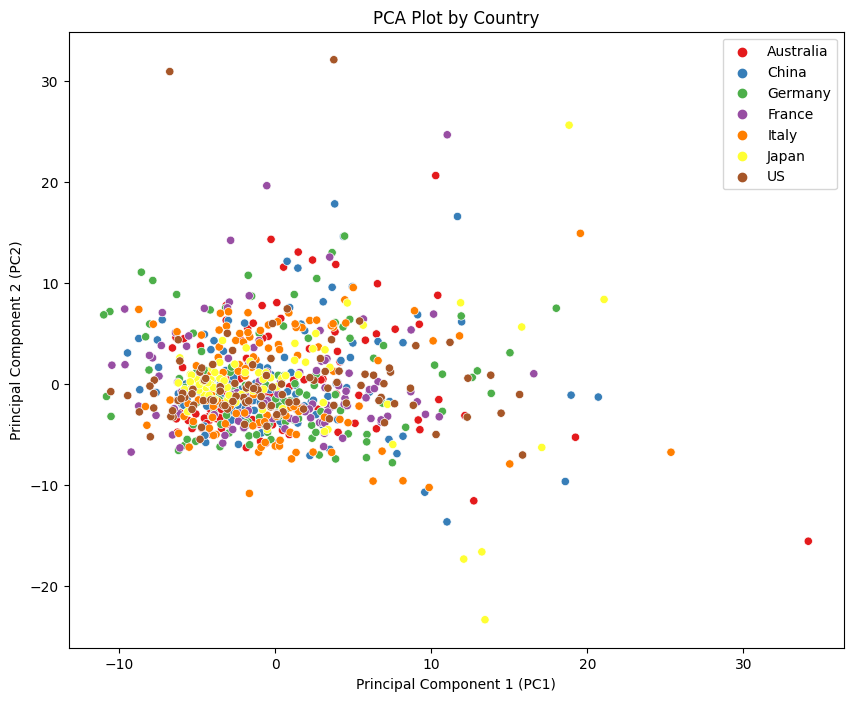

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your concatenated DataFrame (replace this with your actual data)
# combined_df = pd.read_csv('your_combined_data.csv')

# Assuming the bacterial columns start from the second column
bacterial_columns = combined_df.columns[1:-1]  # Exclude the "Country" column

# Create a list to store DataFrames with PCA results for each country
pca_dfs = []

# Iterate through unique countries and perform PCA
unique_countries = combined_df['country'].unique()
for country in unique_countries:
    country_mask = combined_df['country'] == country
    X_country = combined_df[country_mask][bacterial_columns]
    
    # Check if there are enough samples for PCA
    if len(X_country) < 2:
        continue
    
    # Standardize the data
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X_country)
    
    # Perform PCA
    pca = PCA(n_components=2)
    PC = pca.fit_transform(X_std)
    
    # Create a DataFrame with PCA results and country
    pca_df = pd.DataFrame(data=PC, columns=['PC1', 'PC2'])
    pca_df['Country'] = country
    
    # Append to the list of DataFrames
    pca_dfs.append(pca_df)

# Concatenate all DataFrames into a single DataFrame
pca_final_df = pd.concat(pca_dfs, ignore_index=True)

# Create a scatter plot with countries as colors
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_final_df, hue='Country', palette='Set1')
plt.title('PCA Plot by Country')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()
